# Glycoimpact calculation

In [105]:
library(Biostrings)
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.7.1
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.7.1

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
[1] Biostrings_2.52.0   XVector_0.24.0      IRanges_2.18.3     
[4] S4Vectors_0.22.1    BiocGenerics_0.30.0 mixtools_1.1.0     
[7] igraph_1.2.4.1      ggplot2_3.3.2       reshape2_1.4.3     

loaded via a namespace (and not attached):
 [1] Rcp

In [99]:
# load libraries
library(ggplot2)
library(igraph)
library(mixtools)
library(Biostrings)
library(reshape2)

# load glycan-protien relations
load(file='annotation/03_protein_site_stats/glyco_stats.rda')

# ### initialize blosum64 (full)
data(BLOSUM62)
blos62 = melt(BLOSUM62)
#colnames(blos62) = c('refaa','altaa','Blosum62')
#head(blos62)

tmp = BLOSUM62
tmp[lower.tri(tmp,diag=T)]=NA  
blos62_upper=na.omit(melt(tmp))
#head(blos62_upper)


# #dm[lower.tri(dm,diag=T)]=NA  ### remove lower triangle (necessary?)
# df=na.omit(melt(dm))

# blos62=read.table(text=' A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V  B  Z  X  *
# A  4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0 -3 -2  0 -2 -1  0 -4 
# R -1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1 -3 -2 -3 -1  0 -1 -4 
# N -2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0 -4 -2 -3  3  0 -1 -4 
# D -2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1 -4 -3 -3  4  1 -1 -4 
# C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1 -2 -2 -1 -3 -3 -2 -4 
# Q -1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1 -2 -1 -2  0  3 -1 -4 
# E -1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1 -3 -2 -2  1  4 -1 -4 
# G  0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2 -2 -3 -3 -1 -2 -1 -4 
# H -2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2 -2  2 -3  0  0 -1 -4 
# I -1 -3 -3 -3 -1 -3 -3 -4 -3  4  2 -3  1  0 -3 -2 -1 -3 -1  3 -3 -3 -1 -4 
# L -1 -2 -3 -4 -1 -2 -3 -4 -3  2  4 -2  2  0 -3 -2 -1 -2 -1  1 -4 -3 -1 -4 
# K -1  2  0 -1 -3  1  1 -2 -1 -3 -2  5 -1 -3 -1  0 -1 -3 -2 -2  0  1 -1 -4 
# M -1 -1 -2 -3 -1  0 -2 -3 -2  1  2 -1  5  0 -2 -1 -1 -1 -1  1 -3 -1 -1 -4 
# F -2 -3 -3 -3 -2 -3 -3 -3 -1  0  0 -3  0  6 -4 -2 -2  1  3 -1 -3 -3 -1 -4 
# P -1 -2 -2 -1 -3 -1 -1 -2 -2 -3 -3 -1 -2 -4  7 -1 -1 -4 -3 -2 -2 -1 -2 -4 
# S  1 -1  1  0 -1  0  0  0 -1 -2 -2  0 -1 -2 -1  4  1 -3 -2 -2  0  0  0 -4 
# T  0 -1  0 -1 -1 -1 -1 -2 -2 -1 -1 -1 -1 -2 -1  1  5 -2 -2  0 -1 -1  0 -4 
# W -3 -3 -4 -4 -2 -2 -3 -2 -2 -3 -2 -3 -1  1 -4 -3 -2 11  2 -3 -4 -3 -2 -4 
# Y -2 -2 -2 -3 -2 -1 -2 -3  2 -1 -1 -2 -1  3 -3 -2 -2  2  7 -1 -3 -2 -1 -4 
# V  0 -3 -3 -3 -1 -2 -2 -3 -3  3  1 -2  1 -1 -2 -2  0 -3 -1  4 -3 -2 -1 -4 
# B -2 -1  3  4 -3  0  1 -1  0 -3 -4  0 -3 -3 -2  0 -1 -4 -3 -3  4  1 -1 -4 
# Z -1  0  0  1 -3  3  4 -2  0 -3 -3  1 -1 -3 -1  0 -1 -3 -2 -2  1  4 -1 -4 
# X  0 -1 -1 -1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -2  0  0 -2 -1 -1 -1 -1 -1 -4 
# * -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4  1')
# library(reshape2)
# dm=data.matrix(blos62)
# #dm[lower.tri(dm,diag=T)]=NA  ### remove lower triangle (necessary?)
# df=na.omit(melt(dm))



#### glycoimpact network plotting
plot_net<-function(l,dat_in,name,breaks = c(0,5,10,15,20,30,50)){
    for(i in names(l)){
        ## remove high protein structure impact substitutions
        df3 = dat_in[dat_in$v1_type==i &dat_in$value>=0,] 
        ## initialize network
        g = graph_from_edgelist(cbind(as.character(df3$Var1),as.character(df3$Var2)),directed = F)
        E(g)$type = df3$v1_type
        E(g)$blosum64 = df3$value
        E(g)$glyco_dist = df3$glyco_dist
        #E(g)$weight = 1/(2.5+df3$glyco_dist)
        E(g)$weight = 1+(1.1^df3$glyco_dist)

        cuts = length(breaks)-1
        scheme='Zissou1' # 'Red-Blue' #'lajolla'
        pal = hcl.colors(cuts,palette = scheme)
        cols= hcl.colors(cuts,palette = scheme)[ct<-cut(E(g)$glyco_dist,breaks = breaks)]
        
      #  if(make_simple){
       #     g = simplify(g,remove.multiple = T,remove.loops = F,edge.attr.comb = 'min')
       # }

        plot(g,layout=layout_nicely(g),edge.color=cols,vertex.color='white',vertex.frame=NA,main=paste(l[[i]],'\n',name),
             edge.width=2^(E(g)$blosum64) , edge.lty=ifelse(E(g)$blosum64>0,1,2) )

        ct_num =breaks[1:(cuts-1)] #as.numeric(gsub('\\(','',unlist(lapply(strsplit(levels(ct),','),function(x) x[1]))))

        a <- legend('topleft',legend=levels(ct),title='glyco-distance',fill=pal,border=NA,box.col=NA,cex=.5)
        b <- legend('bottomleft',legend=0:3,title='blosum64 >= 1',lwd = c(.1,1:3),lty = c(2,1,1,1),box.col=NA,cex=.5)
    }
}

#' Plot a Mixture Component
#' 
#' @param x Input data
#' @param mu Mean of component
#' @param sigma Standard deviation of component
#' @param lam Mixture weight of component
plot_mix_comps <- function(x, mu, sigma, lam) {
  lam * dnorm(x, mu, sigma)
}


# Get p-values of values relative to lower distribution using gaussian mixture models
basal_posteriors_GMM<-function(x,plot_on=F,type='z',which.f=which.min){
    mixmdl <- normalmixEM(x, k = 2)
    if(plot_on){
          ggplot(mixmdl$x) +
              geom_histogram(aes(x, ..density..), binwidth = 1, colour = "black", fill = "white") +
              stat_function(geom = "line", fun = plot_mix_comps,args = list(mixmdl$mu[1], mixmdl$sigma[1], lam = mixmdl$lambda[1]),colour = "red", lwd = 1.5) +
              stat_function(geom = "line", fun = plot_mix_comps,args = list(mixmdl$mu[2], mixmdl$sigma[2], lam = mixmdl$lambda[2]),colour = "blue", lwd = 1.5) +
              ylab("Density")
    }
    if(type=='p'){
        return( mixmdl$posterior[,which.min(mixmdl$mu)] )
    }else if(type=='z'){
        idx = which.f(mixmdl$mu)
        return( (x - mixmdl$mu[idx])/(mixmdl$sigma[idx]) )
    }else{
        stop('type should be p or z')
    }
}


## Calculate Distance

number of iterations= 18 
number of iterations= 10 
number of iterations= 17 
number of iterations= 11 


Saving 6.67 x 6.67 in image


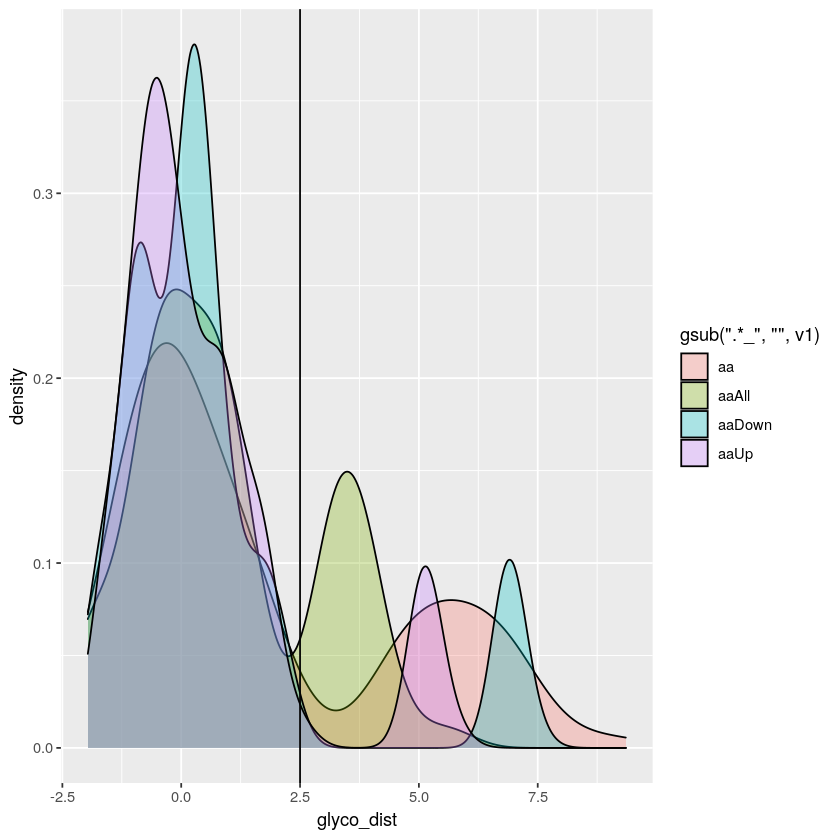

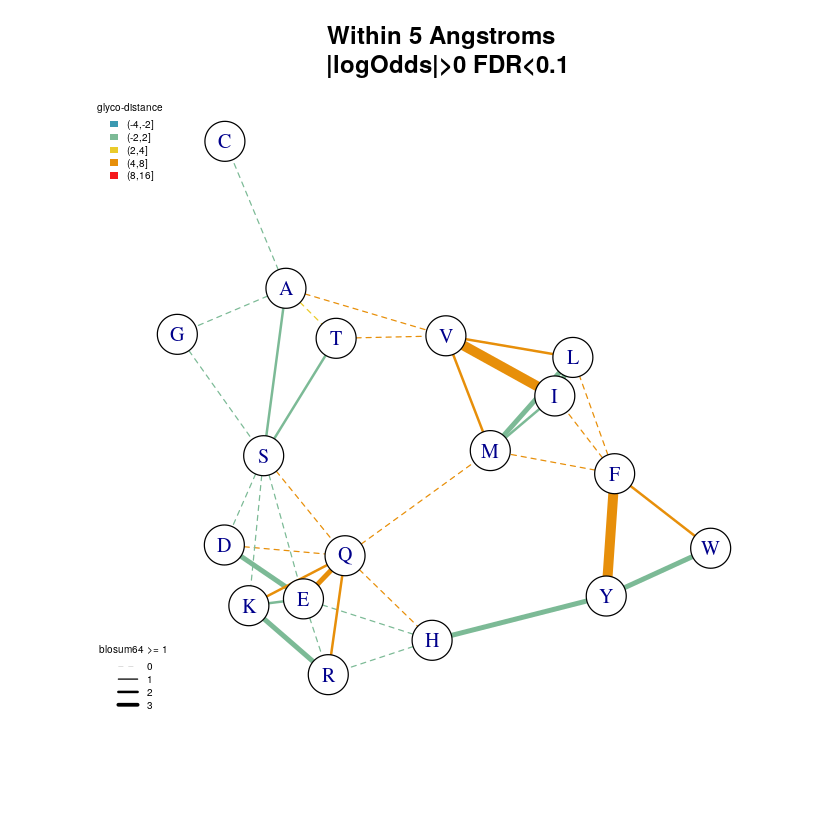

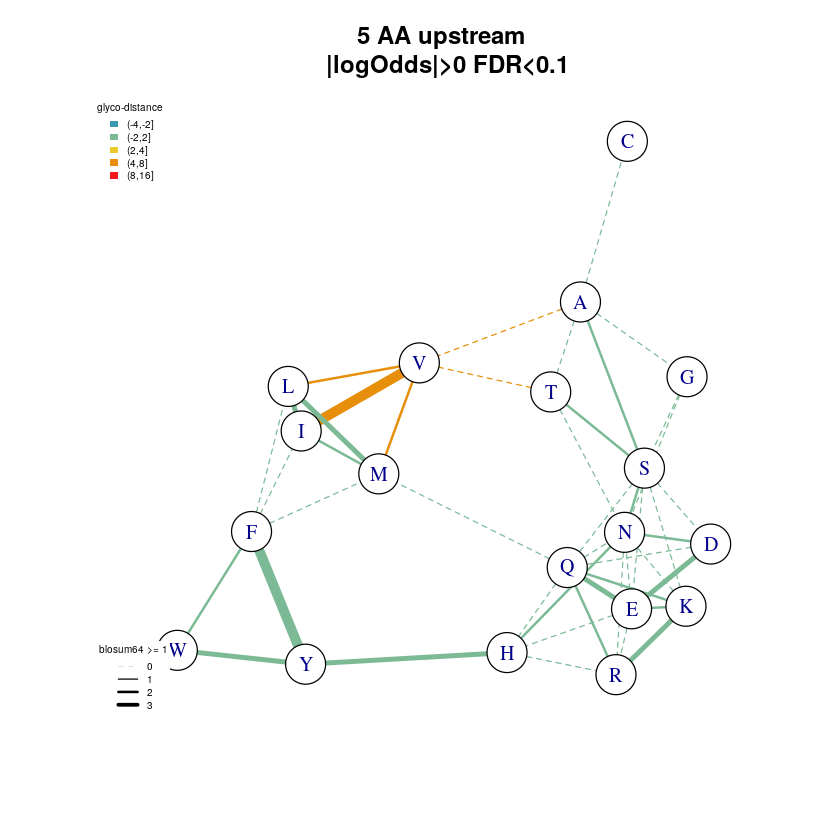

number of iterations= 16 
number of iterations= 50 
number of iterations= 8 
number of iterations= 11 


Saving 6.67 x 6.67 in image


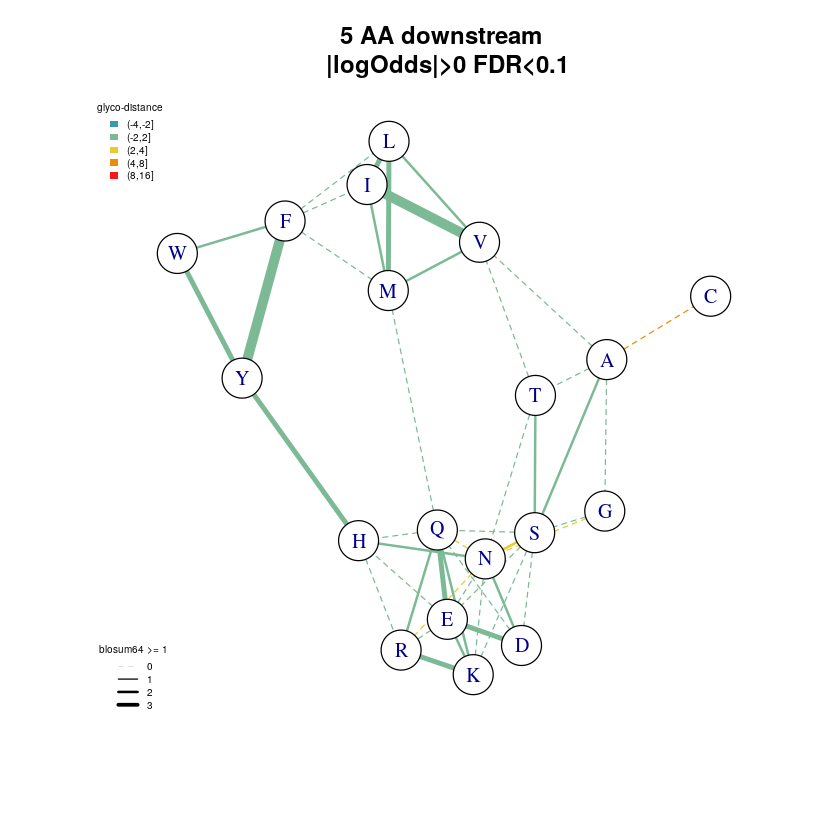

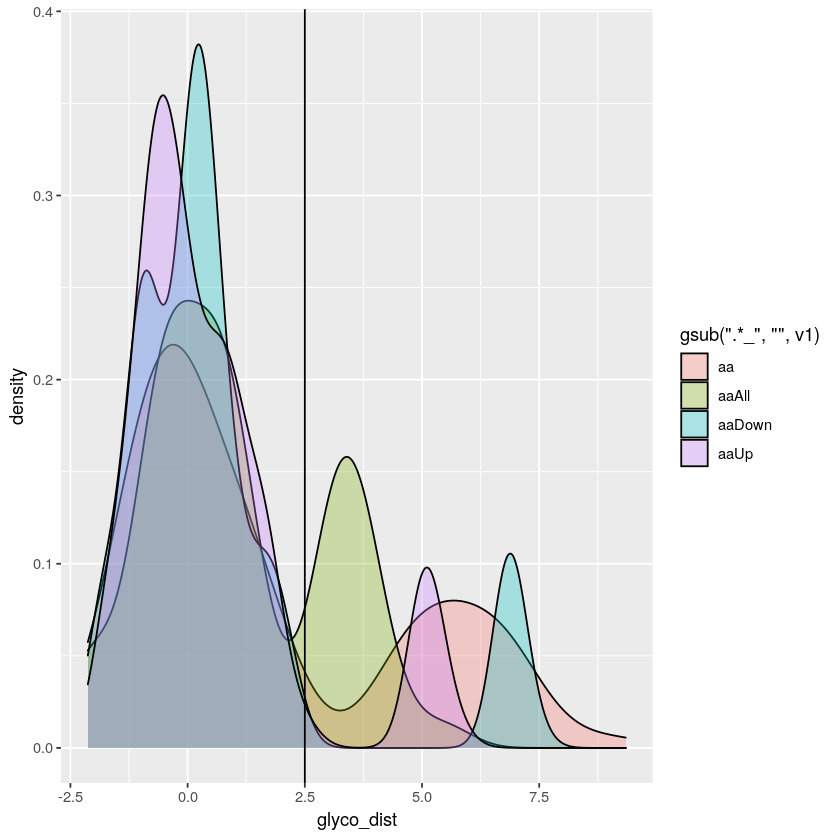

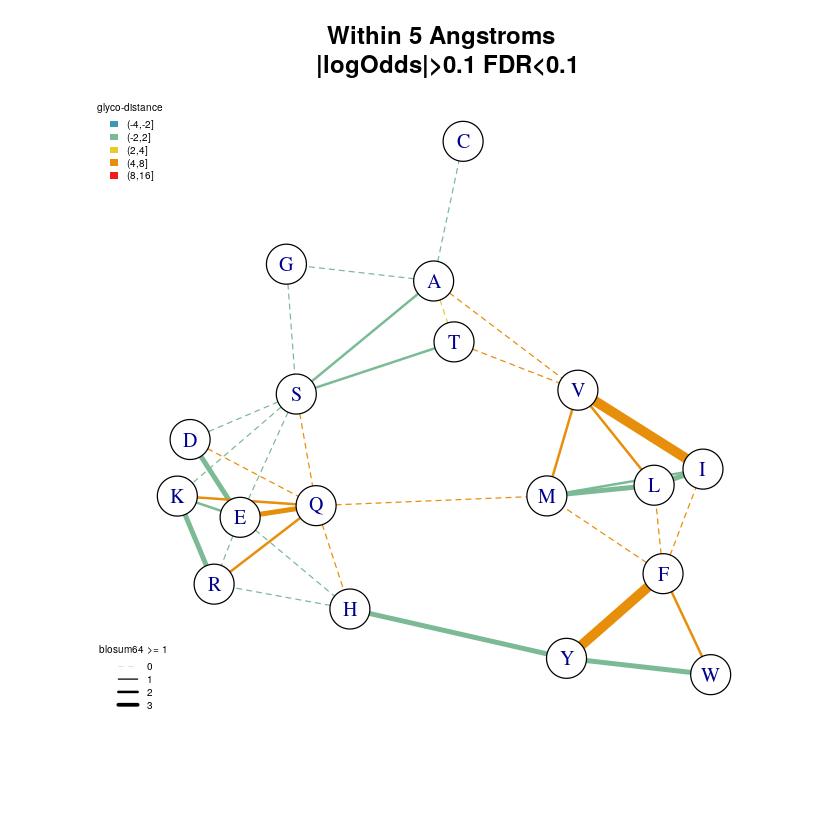

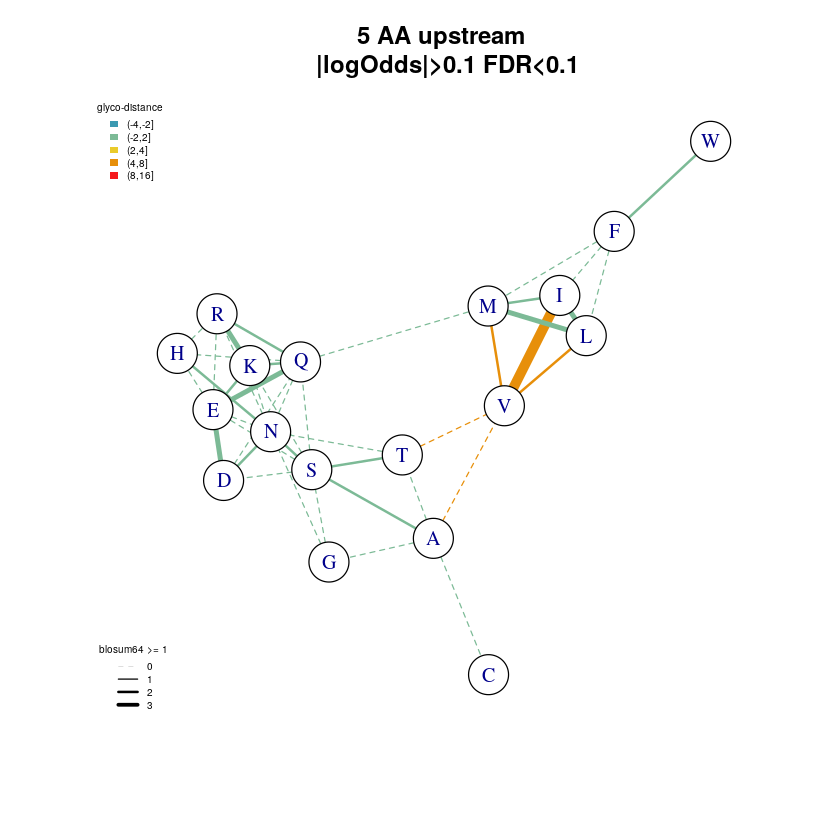

number of iterations= 6 
number of iterations= 49 
number of iterations= 7 
number of iterations= 12 


Saving 6.67 x 6.67 in image


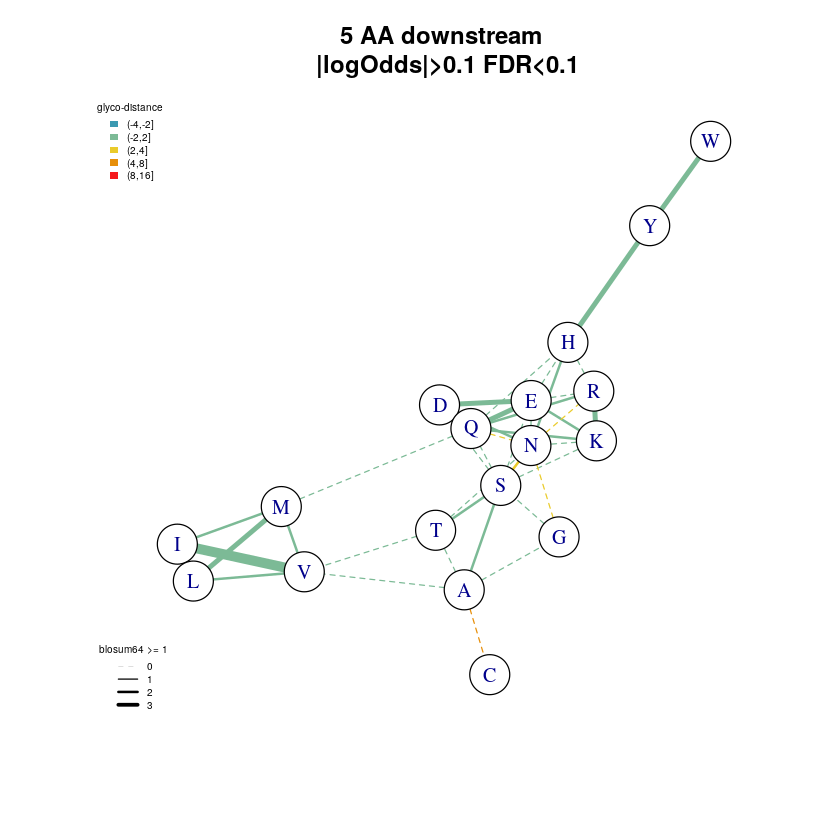

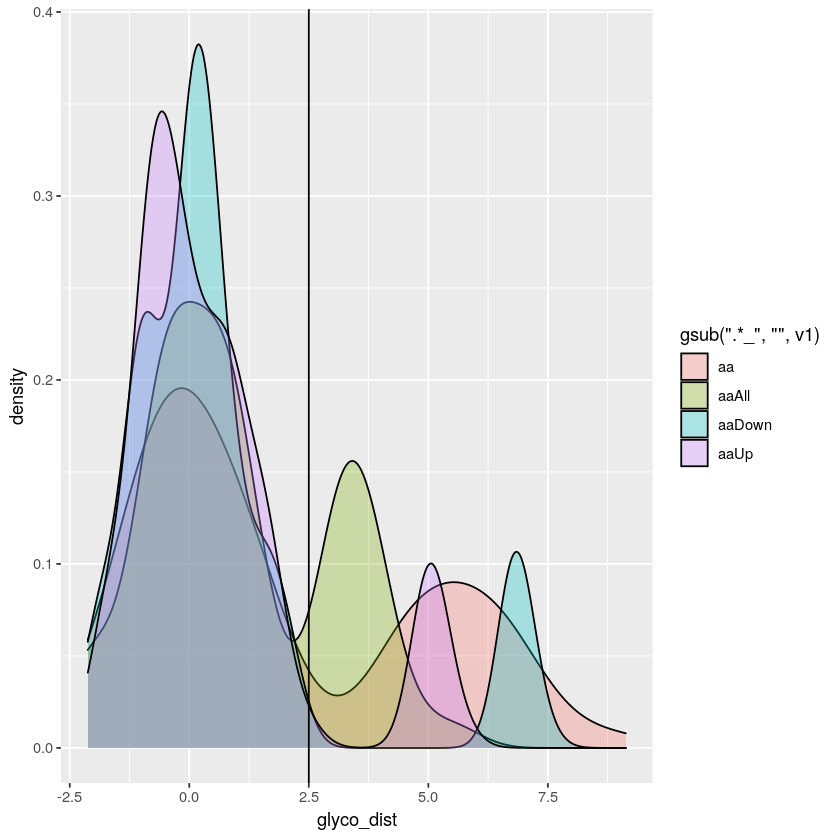

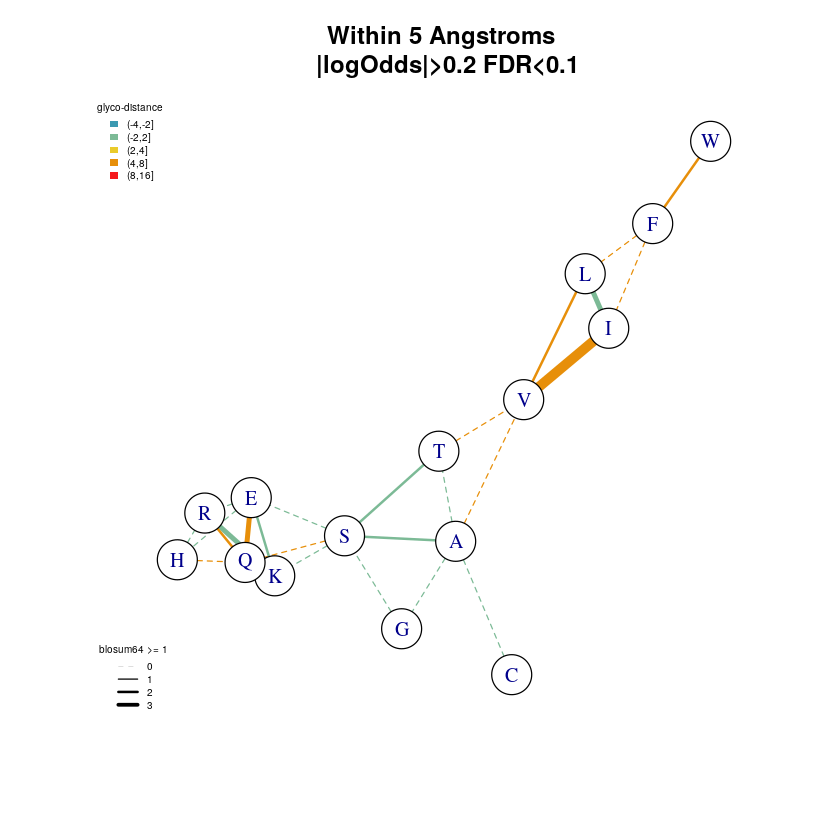

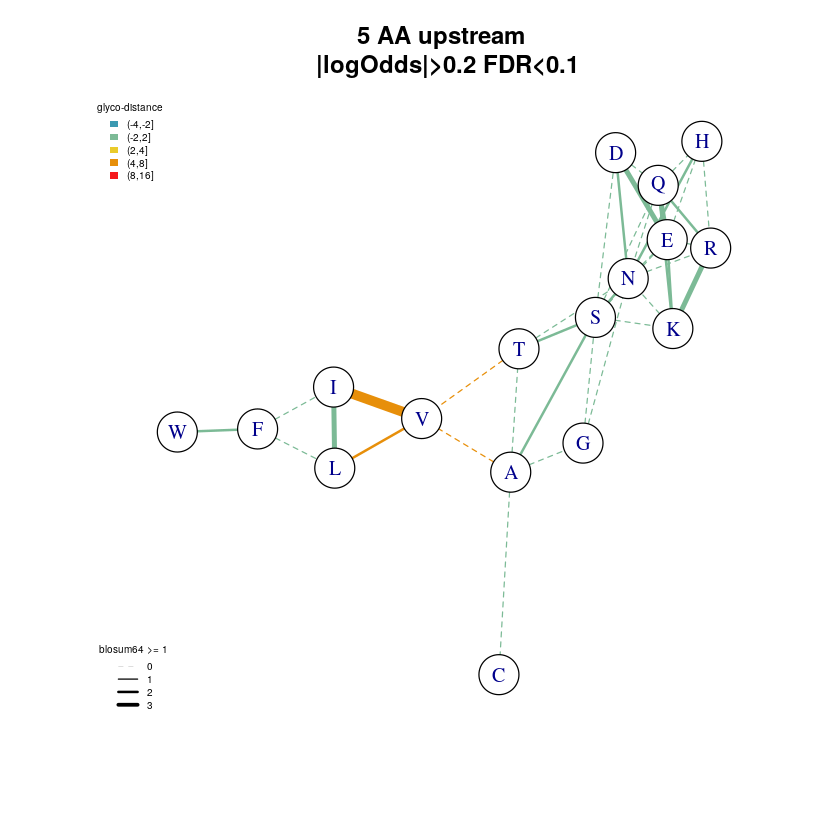

number of iterations= 14 
number of iterations= 27 
number of iterations= 23 
number of iterations= 8 


Saving 6.67 x 6.67 in image


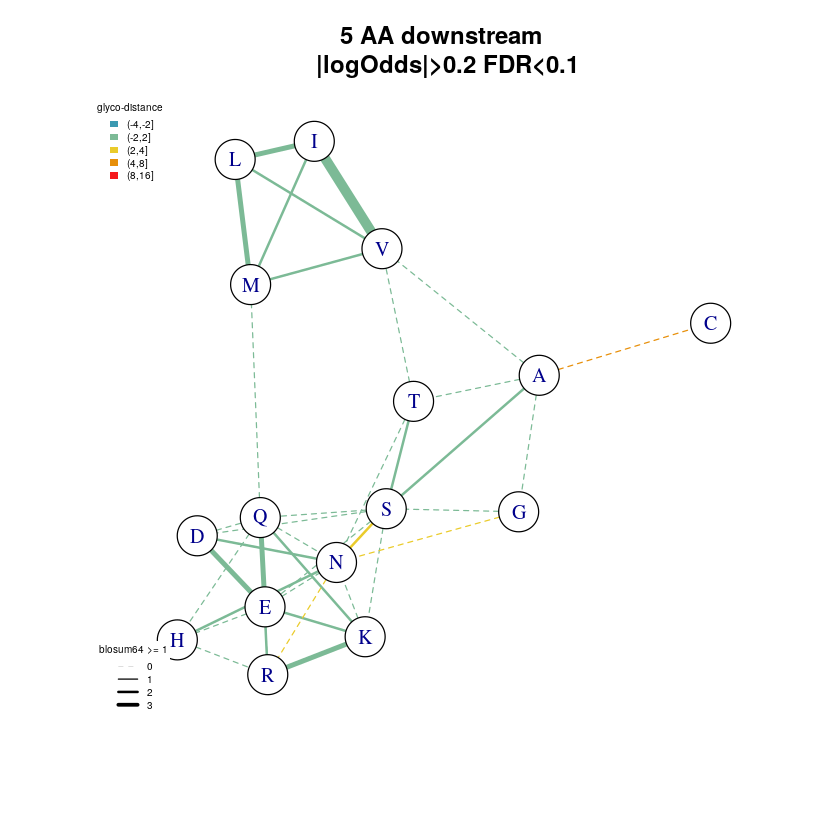

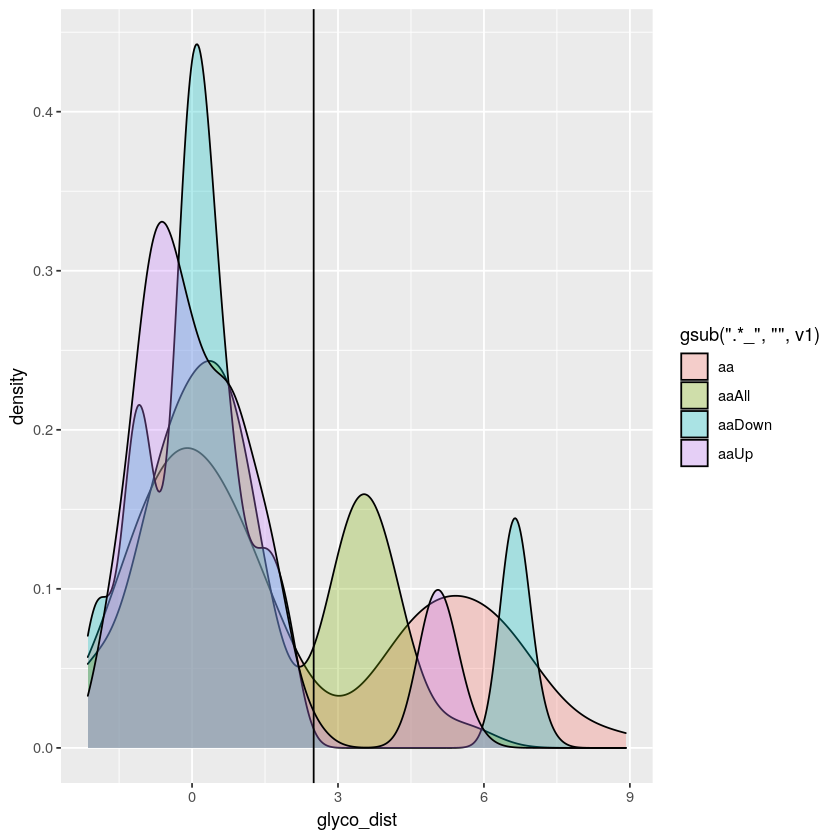

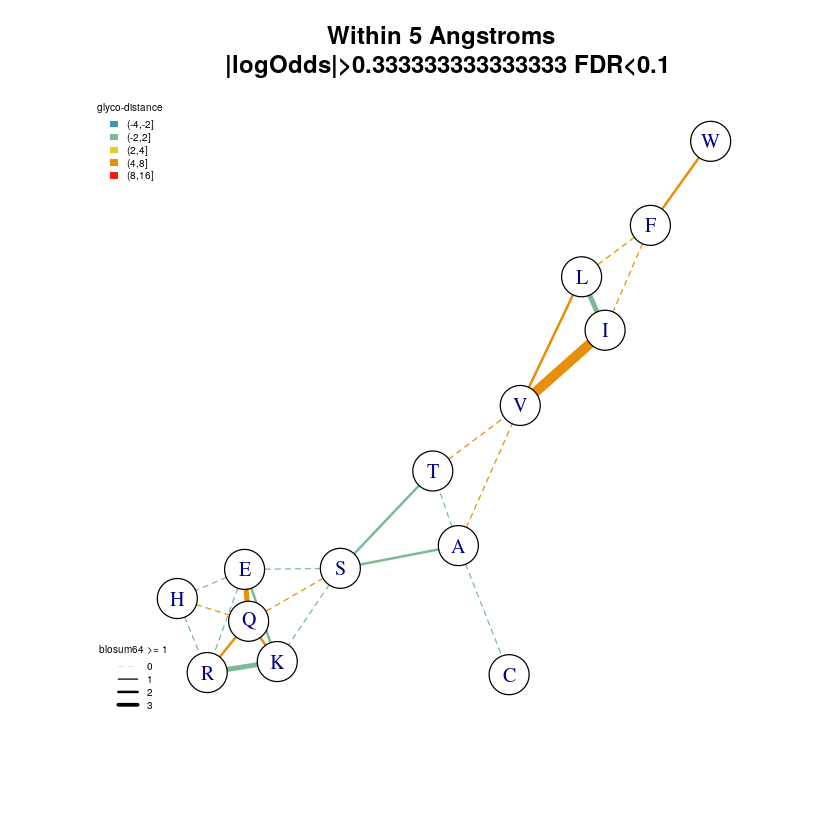

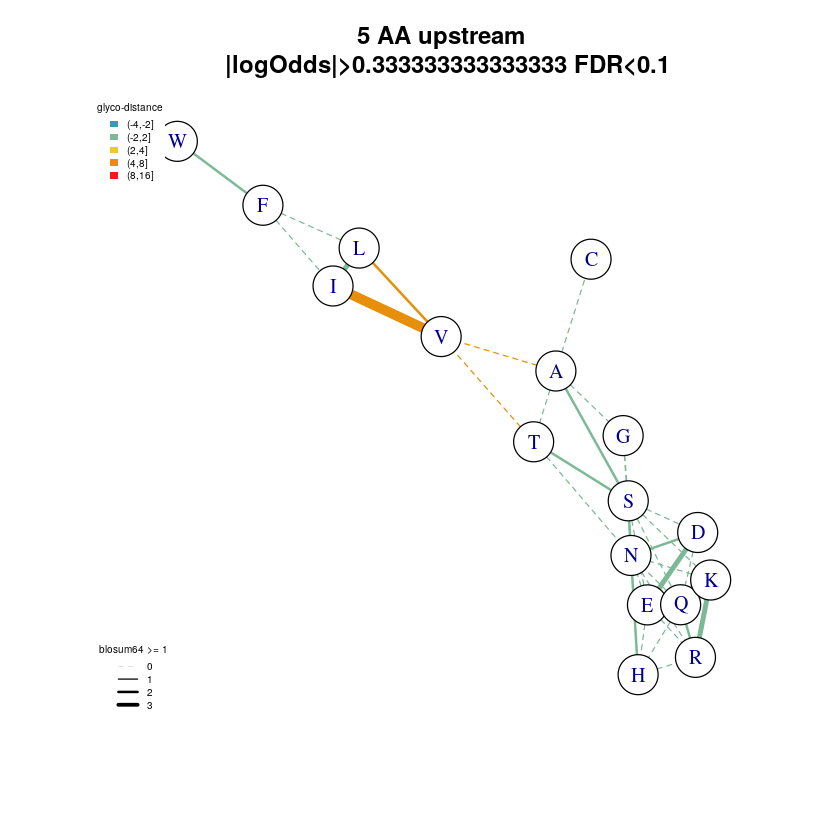

number of iterations= 11 
number of iterations= 60 
number of iterations= 19 
number of iterations= 10 


Saving 6.67 x 6.67 in image


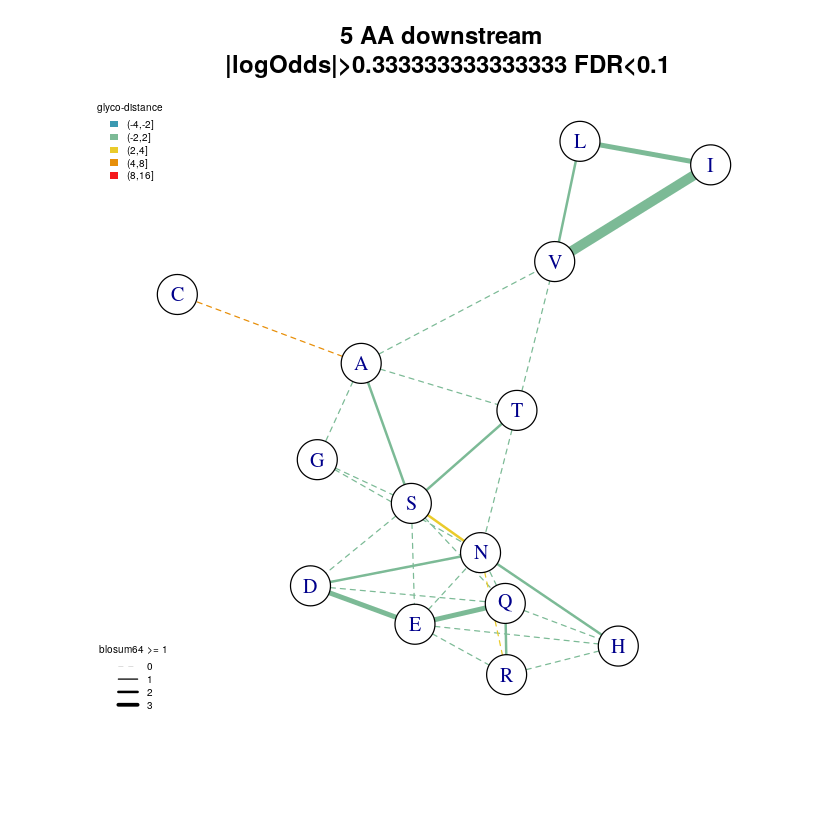

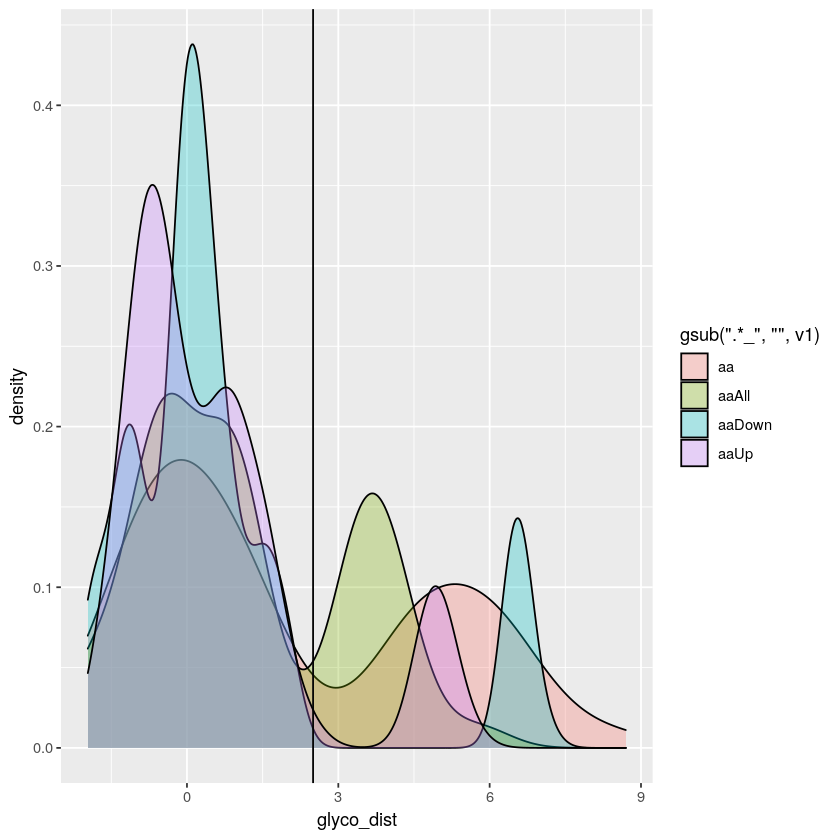

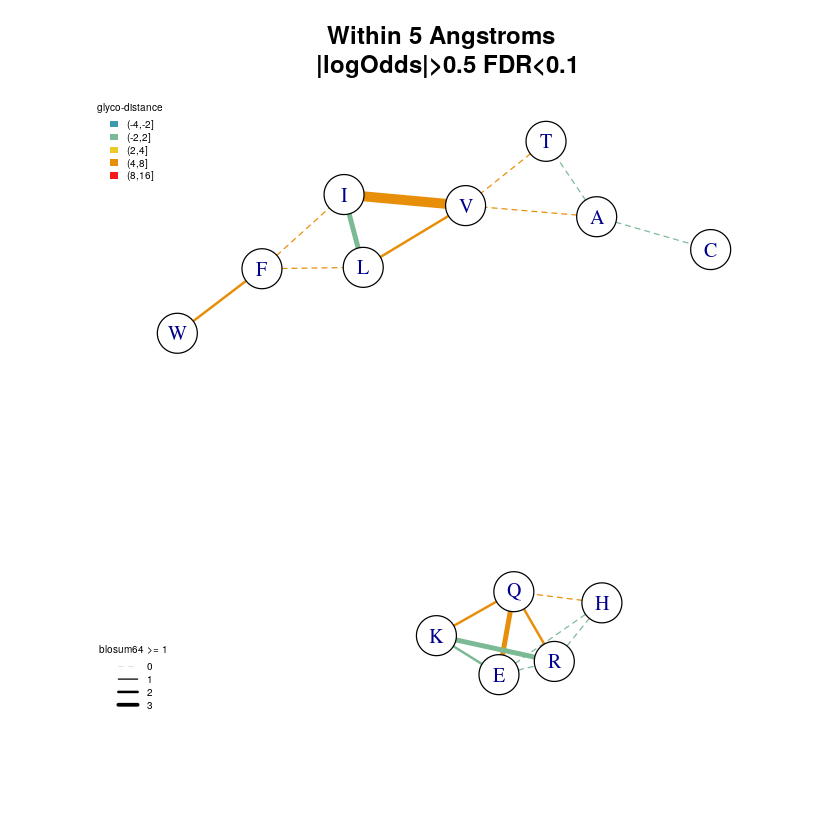

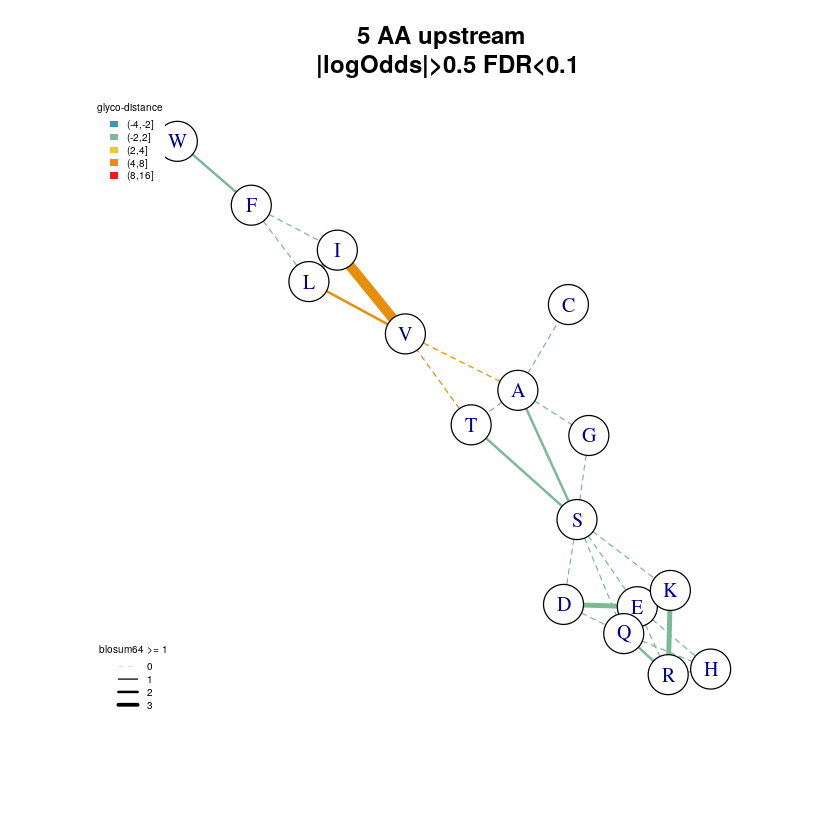

number of iterations= 5 
number of iterations= 15 
number of iterations= 14 
number of iterations= 9 


Saving 6.67 x 6.67 in image


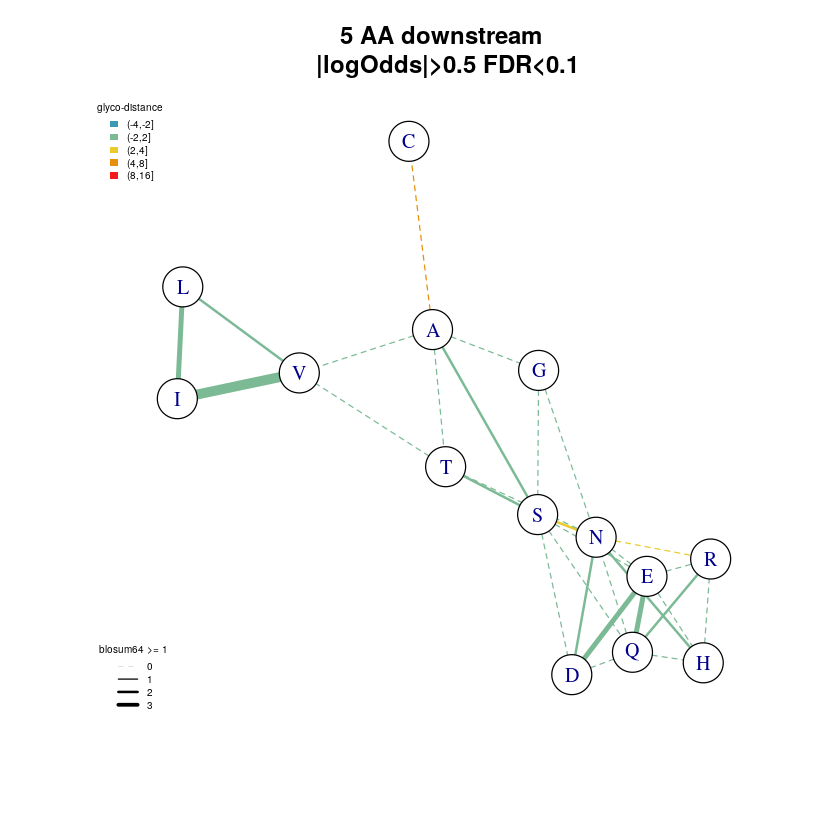

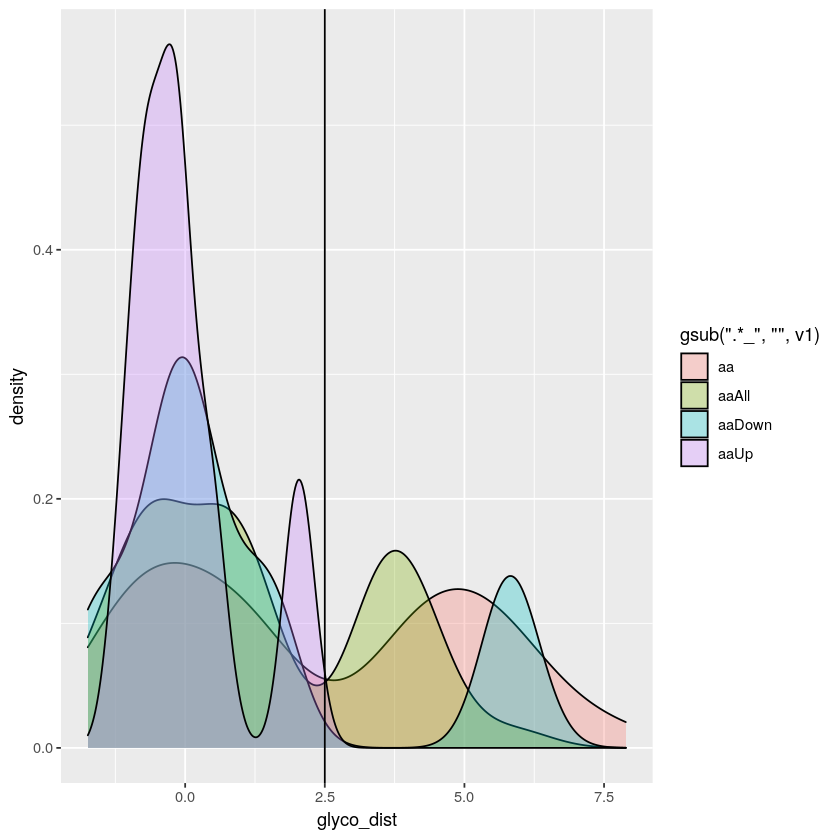

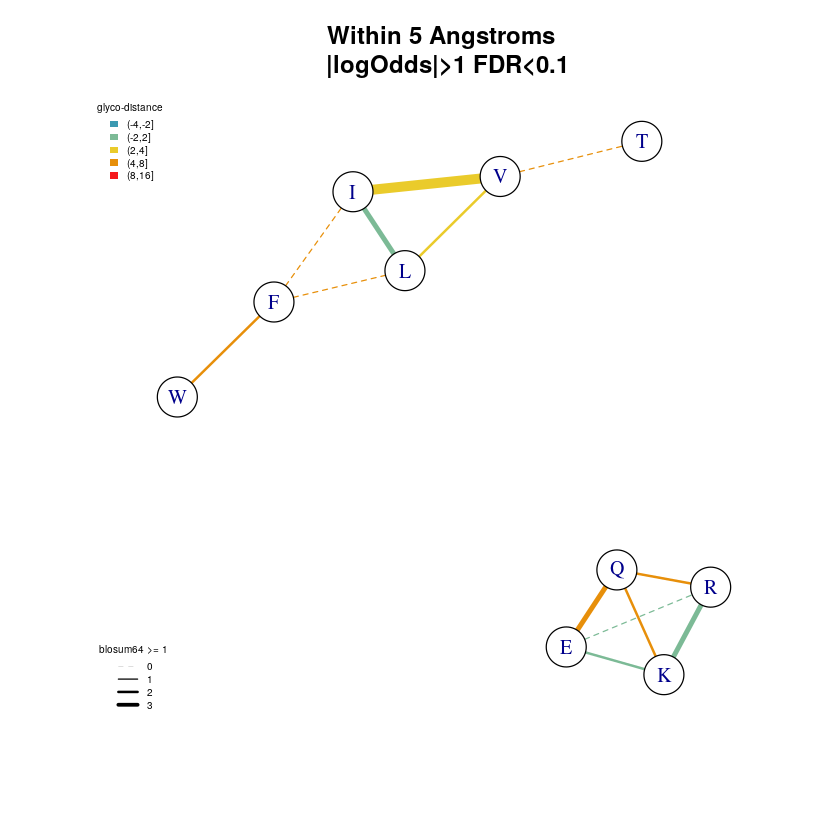

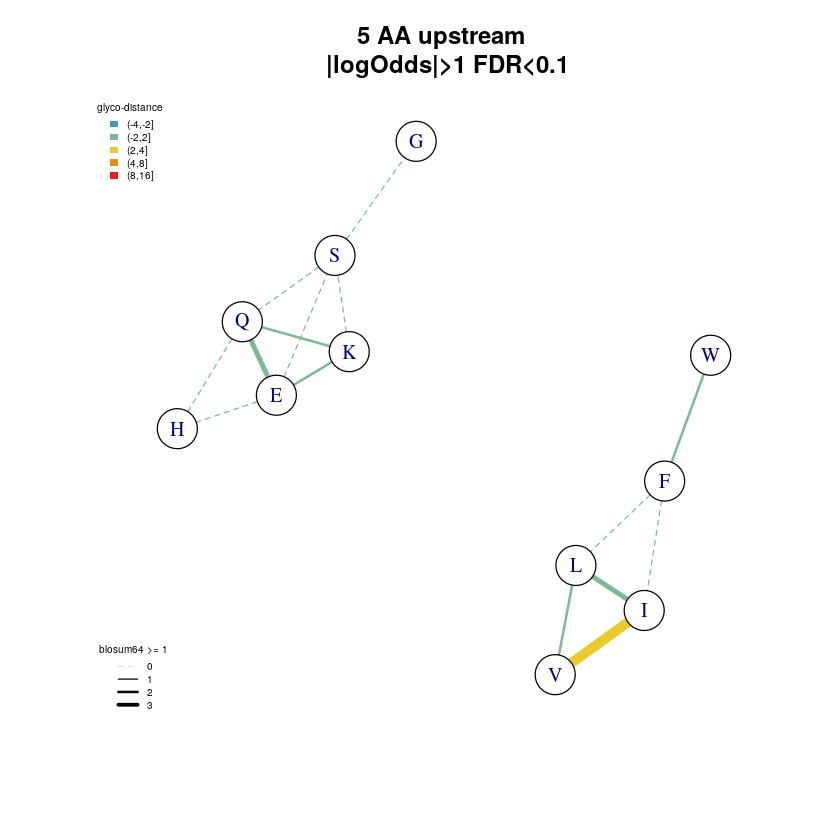

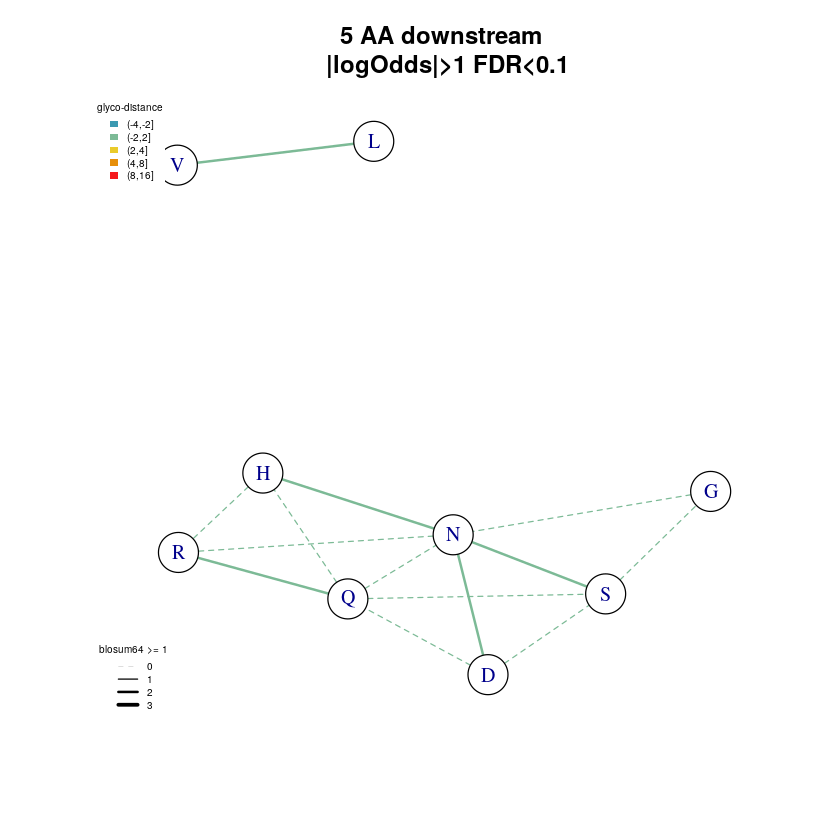

In [103]:
coef_thresholds = c(0,1/10,1/5,1/3,1/2,1)
l = list(aa='Within 5 Angstroms',aaUp='5 AA upstream',aaDown='5 AA downstream')

#####
glycoimpact_score = list()
for(t in coef_thresholds){
    ## what are the lowest impact aa substitutions with the highest glycan impact?
    tmp=out[ (out$tool=='aa' | out$tool=='aaAll' | out$tool=='aaUp' | out$tool=='aaDown') & abs(log2(out$coef))>t &
            p.adjust(out$Pr_w,'fdr')<.1 & out$sequon=='ASN' , ]

    ## init glycan x protein structure coeficient matrix
    tmp2=dcast(motif ~ measure+tool,value.var ='coef',data=tmp,fill = 1)
    rownames(tmp2)=tmp2[,1]

    ## get protein structure distance matrix over glycan motifs
    tmp3=melt(as.matrix(dist(t(tmp2[,-1]))))
    tmp3=cbind(tmp3,do.call(rbind,strsplit(as.character(tmp3$Var1),'_')),
          do.call(rbind,strsplit(as.character(tmp3$Var2),'_')))
    colnames(tmp3)=c('v1','v2','glyco_dist','Var1','v1_type','Var2','v2_type')
    
    ## remove trans-type information
    tmp3 = tmp3[(tmp3$v1_type==tmp3$v2_type),]
    
    ## normalize glyco_distance
    glyco_dist_norm = rep(NA,nrow(tmp3))
    for(type in c('aa','aaAll','aaUp','aaDown')){
        dist_i = tmp3$glyco_dist[ tmp3$v1_type==type ]
        #glyco_dist_norm[tmp3$v1_type==type] = -log10(basal_posteriors_GMM(dist_i,type = 'p'))
        glyco_dist_norm[tmp3$v1_type==type] = basal_posteriors_GMM(dist_i,type='z',which.f=which.min)
        #glyco_dist_norm[tmp3$v1_type==type] = I(dist_i)
    }
    tmp3$glyco_dist = glyco_dist_norm


    ## add blosum info
    df2=merge(blos62,tmp3)
    df2_upper=merge(blos62_upper,tmp3)

    g=ggplot(df2[grepl('_aa',df2$v1),],aes(x=glyco_dist,fill=gsub('.*_','',v1)))+
        geom_density(alpha=.3)+#facet_wrap(~gsub('.*_','',v1))+
        geom_vline(xintercept = 2.5)
    print(g)
    ggsave(g,filename=paste0('figures/03.statistical_trends/glyco_distance/glycodist_distributions.OR_thresh_',t,'.pdf'))

    write.csv(df2,file=paste0('annotation/03_Regressions_MutualInformation/glyco_impact.',t,'.csv'))
    
    ##### make networks
    pdf(paste0('figures/03.statistical_trends/glyco_distance/glycodist_networks.OR_thresh_',t,'.pdf'))
    
    # get unique edges
    #unique_edges = paste(df2$Var1,df2$Var2,sep='_') %in% apply(combn(unique(as.character(df2$Var1)),2),2,paste,collapse='_')
    plot_net(l,df2_upper,name=paste0('|logOdds|>',t,' FDR<0.1'),breaks=c(-4,-2,2,4,8,16))
    dev.off()
    
    plot_net(l,df2_upper,name=paste0('|logOdds|>',t,' FDR<0.1'),breaks=c(-4,-2,2,4,8,16))

    
    glycoimpact_score[[as.character(t)]]=df2

}

In [92]:
dcast(v1 ~ v2 , value.var = 'glyco_dist',data=df2[df2$v1_type=='aa',],fill = NA)


v1,C_aa,E_aa,F_aa,I_aa,K_aa,L_aa,Q_aa,R_aa,T_aa,V_aa,W_aa
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C_aa,-1.37217869,0.09684848,5.699128,-0.3878772,0.9118981,-0.3950544,4.758815,-0.3889369,1.387681,3.899774,-0.17272340
E_aa,0.09684848,-1.37217869,5.722616,-0.2313094,0.9836100,-0.2374958,4.785890,-0.2322235,1.447317,3.931237,-0.04122925
F_aa,5.69912755,5.72261555,-1.372179,5.6383073,5.9350144,5.6373032,7.888876,5.6381586,6.097419,7.343987,5.67173765
I_aa,-0.38787724,-0.23130939,5.638307,-1.3721787,0.7160140,-1.0586285,4.688566,-1.0400547,1.227892,3.817911,-0.60913550
K_aa,0.91189808,0.98360995,5.935014,0.7160140,-1.3721787,0.7126405,5.029444,0.7155147,1.945731,4.212191,0.82563665
L_aa,-0.39505443,-0.23749580,5.637303,-1.0586285,0.7126405,-1.3721787,4.687404,-1.0619709,1.225183,3.816554,-0.61841653
Q_aa,4.75881458,4.78589015,7.888876,4.6885655,5.0294444,4.6874040,-1.372179,4.6883935,5.214216,6.600102,4.72720357
R_aa,-0.38893689,-0.23222349,5.638159,-1.0400547,0.7155147,-1.0619709,4.688394,-1.3721787,1.227491,3.817710,-0.61050290
T_aa,1.38768080,1.44731733,6.097419,1.2278918,1.9457308,1.2251832,5.214216,1.2274908,-1.372179,4.423078,1.31672628


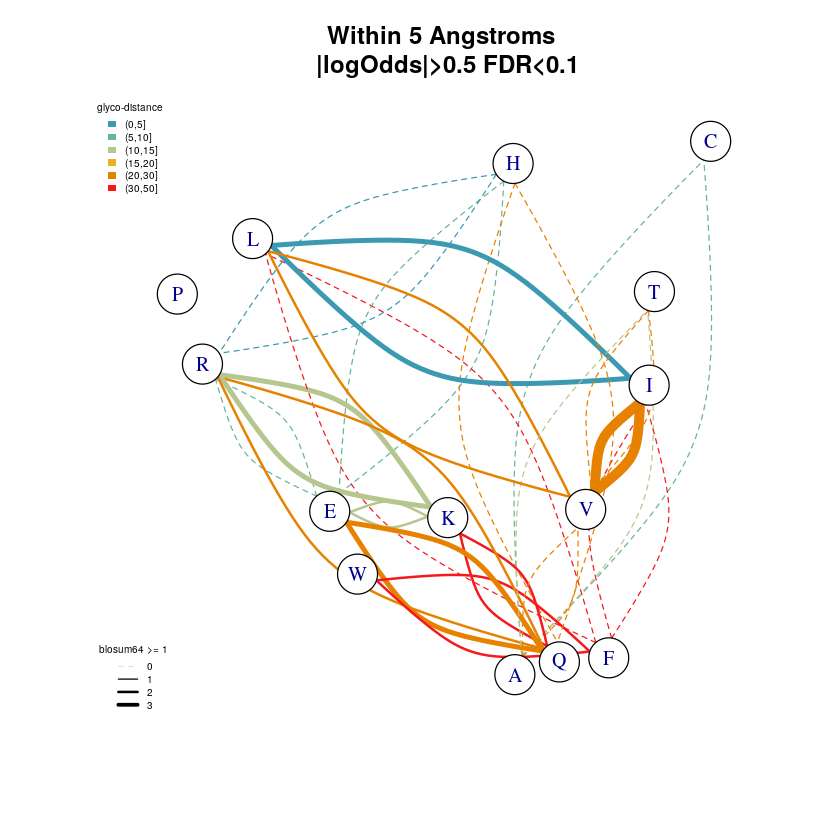

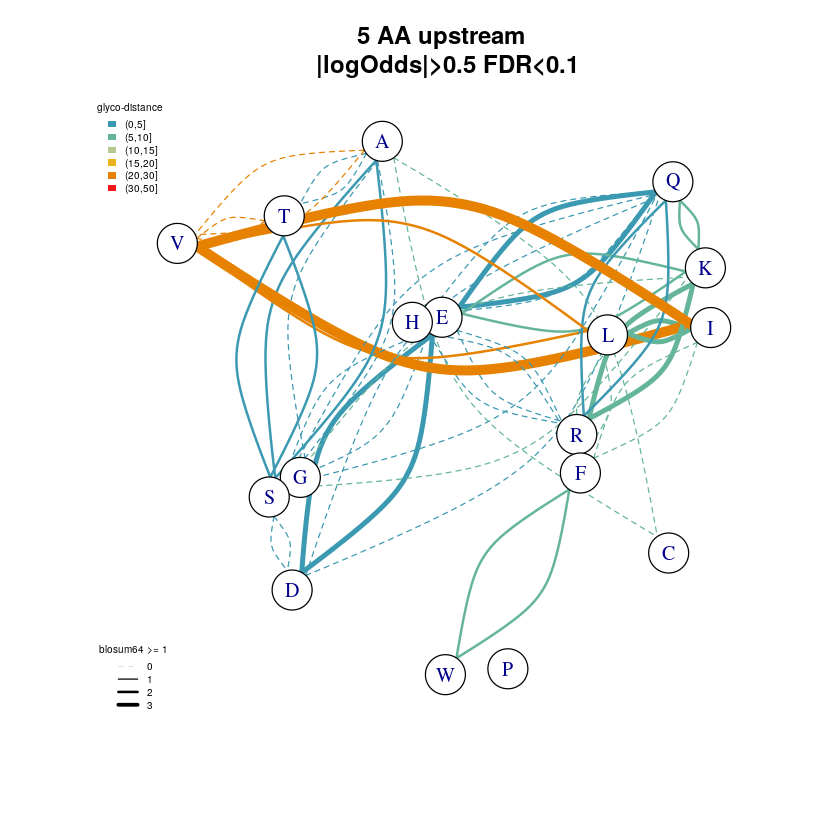

,Var1,Var2,value,v1,v2,glyco_dist,v1_type,v2_type
,<fct>,<fct>,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>
1,A,A,4,A_aa,A_aa,0.00000,aa,aa
9,A,A,4,A_aaAll,A_aaAll,0.00000,aaAll,aaAll
10,A,A,4,A_aaDown,A_aaDown,0.00000,aaDown,aaDown
16,A,A,4,A_aaUp,A_aaUp,0.00000,aaUp,aaUp
20,A,C,0,A_aaDown,C_aaDown,21.36690,aaDown,aaDown
21,A,C,0,A_aaUp,C_aaUp,9.95637,aaUp,aaUp


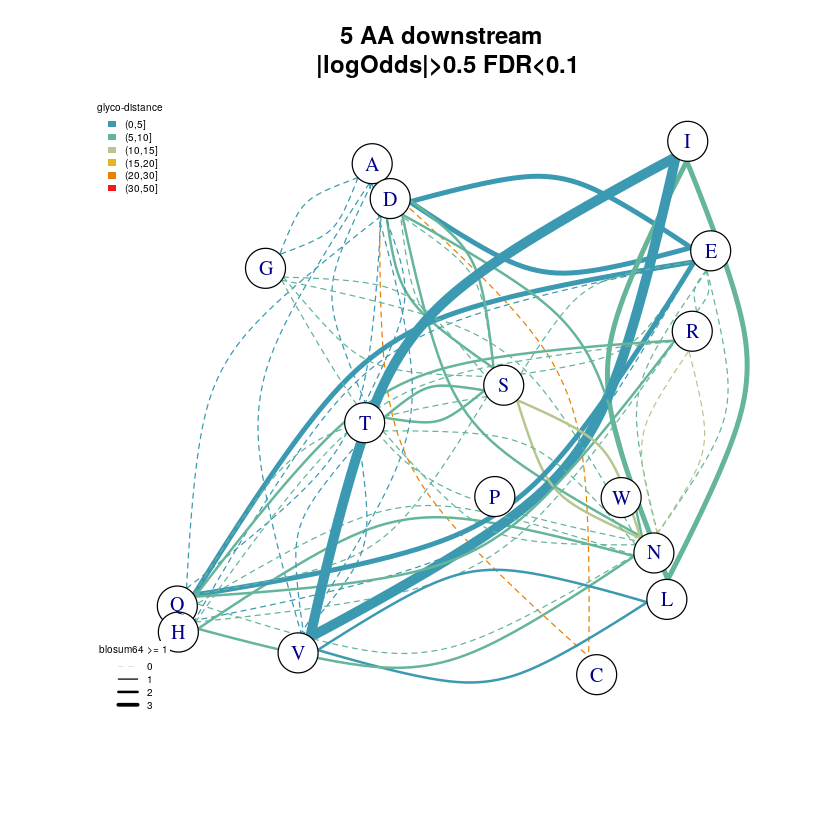

number of iterations= 9 


v1,A_aa,C_aa,E_aa,F_aa,H_aa,I_aa,K_aa,L_aa,P_aa,Q_aa,R_aa,T_aa,V_aa,W_aa
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A_aa,3.141064e-09,1.417299e-05,3.035444e-05,8.459481e+00,6.727057e-06,4.456662e-06,6.069432e-04,4.288426e-06,4.794153e-06,5.915090e+00,1.118379e-05,6.309637e-03,3.746323e+00,8.770892e-06
C_aa,1.417299e-05,3.141064e-09,3.443053e-06,8.145534e+00,4.567675e-07,2.453190e-07,1.167975e-04,2.308924e-07,2.748477e-07,5.568793e+00,9.348653e-07,1.542035e-03,3.361556e+00,6.676559e-07
E_aa,3.035444e-05,3.443053e-06,3.141064e-09,8.263851e+00,1.417318e-06,8.529150e-07,2.218945e-04,8.127286e-07,9.729307e-07,5.699472e+00,2.347162e-06,3.032591e-03,3.507010e+00,2.095340e-06
F_aa,8.459481e+00,8.145534e+00,8.263851e+00,3.141064e-09,8.037708e+00,7.981622e+00,8.802592e+00,7.976510e+00,7.991381e+00,1.444683e+01,8.057566e+00,9.297663e+00,1.282173e+01,8.075175e+00
H_aa,6.727057e-06,4.567675e-07,1.417318e-06,8.037708e+00,3.141064e-09,5.357766e-08,6.338321e-05,4.892368e-08,6.327455e-08,5.449515e+00,3.116647e-07,9.268914e-04,2.194862e+00,2.060536e-07
I_aa,4.456662e-06,2.453190e-07,8.529150e-07,7.981622e+00,5.357766e-08,3.141064e-09,4.882036e-05,1.313442e-08,2.031702e-08,5.387400e+00,1.586179e-07,7.071903e-04,3.159120e+00,9.752977e-08
K_aa,6.069432e-04,1.167975e-04,2.218945e-04,8.802592e+00,6.338321e-05,4.882036e-05,3.141064e-09,4.422618e-05,1.970936e-05,6.291957e+00,9.598670e-05,2.630880e-02,4.162647e+00,7.862709e-05
L_aa,4.288426e-06,2.308924e-07,8.127286e-07,7.976510e+00,4.892368e-08,1.313442e-08,4.422618e-05,3.141064e-09,1.769921e-08,5.381736e+00,1.483658e-07,6.898225e-04,3.152788e+00,9.042337e-08
P_aa,4.794153e-06,2.748477e-07,9.729307e-07,7.991381e+00,6.327455e-08,2.031702e-08,1.970936e-05,1.769921e-08,3.141064e-09,5.398211e+00,1.796979e-07,7.414962e-04,3.171203e+00,9.436078e-08


,A_aa,C_aa,E_aa,F_aa,H_aa,I_aa,K_aa,L_aa,P_aa,Q_aa,R_aa,T_aa,V_aa,W_aa
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A_aa,3.141064e-09,2.834599e-05,6.070888e-05,1.691896e+01,1.345411e-05,8.913323e-06,1.213886e-03,8.576852e-06,9.588306e-06,1.183018e+01,2.236758e-05,1.261927e-02,7.492645e+00,1.754178e-05
C_aa,2.834599e-05,3.141064e-09,6.886106e-06,1.629107e+01,9.135349e-07,4.906380e-07,2.335950e-04,4.617847e-07,5.496953e-07,1.113759e+01,1.869731e-06,3.084071e-03,6.723111e+00,1.335312e-06
E_aa,6.070888e-05,6.886106e-06,3.141064e-09,1.652770e+01,2.834635e-06,1.705830e-06,4.437890e-04,1.625457e-06,1.945861e-06,1.139894e+01,4.694323e-06,6.065181e-03,7.014020e+00,4.190680e-06
F_aa,1.691896e+01,1.629107e+01,1.652770e+01,3.141064e-09,1.607542e+01,1.596324e+01,1.760518e+01,1.595302e+01,1.598276e+01,2.889365e+01,1.611513e+01,1.859533e+01,2.564347e+01,1.615035e+01
H_aa,1.345411e-05,9.135349e-07,2.834635e-06,1.607542e+01,3.141064e-09,1.071553e-07,1.267664e-04,9.784737e-08,1.265491e-07,1.089903e+01,6.233294e-07,1.853783e-03,4.389723e+00,4.121072e-07
I_aa,8.913323e-06,4.906380e-07,1.705830e-06,1.596324e+01,1.071553e-07,3.141064e-09,9.764073e-05,2.626884e-08,4.063403e-08,1.077480e+01,3.172359e-07,1.414381e-03,6.318239e+00,1.950595e-07
K_aa,1.213886e-03,2.335950e-04,4.437890e-04,1.760518e+01,1.267664e-04,9.764073e-05,3.141064e-09,8.845236e-05,3.941871e-05,1.258391e+01,1.919734e-04,5.261760e-02,8.325295e+00,1.572542e-04
L_aa,8.576852e-06,4.617847e-07,1.625457e-06,1.595302e+01,9.784737e-08,2.626884e-08,8.845236e-05,3.141064e-09,3.539841e-08,1.076347e+01,2.967315e-07,1.379645e-03,6.305577e+00,1.808467e-07
P_aa,9.588306e-06,5.496953e-07,1.945861e-06,1.598276e+01,1.265491e-07,4.063403e-08,3.941871e-05,3.539841e-08,3.141064e-09,1.079642e+01,3.593959e-07,1.482992e-03,6.342405e+00,1.887216e-07


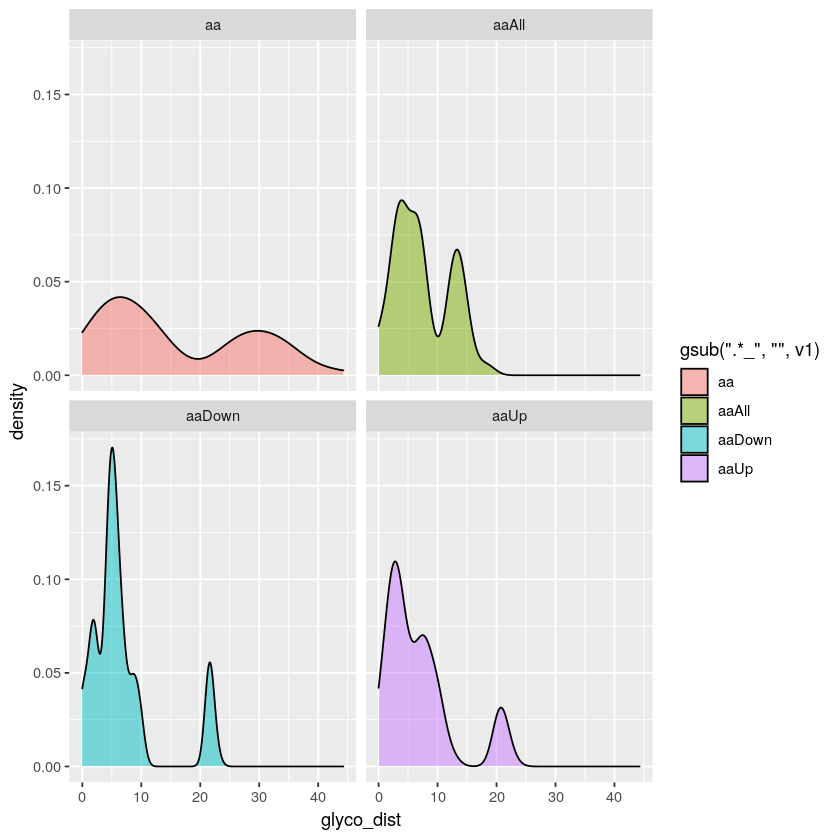

In [51]:
t='0.5'
df2 = glycoimpact_score[[t]]
plot_net(l,df2,name=paste0('|logOdds|>',t,' FDR<0.1'))

#dir.create('figures/03.statistical_trends/glyco_distance')

########################################################

library(mixtools)



head(df2)
ggplot(df2[grepl('_aa',df2$v1),],aes(x=glyco_dist,fill=gsub('.*_','',v1)))+geom_density(alpha=.5)+facet_wrap(~gsub('.*_','',v1))


df2$glyco_dist_norm = NA
df2$glyco_dist_norm[grepl('_aa$',df2$v1)] = -log10(basal_posteriors_GMM(df2$glyco_dist[grepl('_aa$',df2$v1)]))

tmp = dcast(v1 ~ v2 , value.var = 'glyco_dist_norm',data=df2[grepl('_aa$',df2$v1),],fill = NA)
tmp
rownames(tmp) = tmp[,1]
tmp = tmp[,-1]
upper=tmp[upper.tri(tmp)]+t(tmp)[upper.tri(tmp)]
lower=tmp[lower.tri(tmp)]+t(tmp)[lower.tri(tmp)]
tmp[upper.tri(tmp)] = upper
tmp[lower.tri(tmp)] = lower
tmp

In [ ]:

l = list(aa='Within 5 Angstroms',aaUp='5 AA upstream',aaDown='5 AA downstream')

#####
glycoimpact_score = list()
for(t in c(0,1/100,1/10,1/5,1/2,1,2)){
    ## what are the lowest impact aa substitutions with the highest glycan impact?
    tmp=out[ (out$tool=='aa' | out$tool=='aaAll' | out$tool=='aaUp' | out$tool=='aaDown') & abs(log2(out$coef))>t &
            p.adjust(out$Pr_w,'fdr')<.1 & out$sequon=='ASN' , ]

    tmp2=dcast(motif ~ measure+tool,value.var ='coef',data=tmp,fill = 1)
    rownames(tmp2)=tmp2[,1]

    tmp3=melt(as.matrix(dist(t(tmp2[,-1]))))
    tmp3=cbind(tmp3,do.call(rbind,strsplit(as.character(tmp3$Var1),'_')),
          do.call(rbind,strsplit(as.character(tmp3$Var2),'_')))
    colnames(tmp3)=c('v1','v2','glyco_dist','Var1','v1_type','Var2','v2_type')

    df2=merge(df,tmp3)
    df2 = df2[(df2$v1_type==df2$v2_type),]
    normalize <- function(x){
        x = x+min(x)
        return((x- min(x)) /(max(x)-min(x)))
    }

    head(df2[order(normalize(df2$value)*normalize(df2$glyco_dist),decreasing = T),],n=20)

    head(df2[order(df2$value/normalize(df2$glyco_dist+1e-6),decreasing = T),],n=20)

    head(df2[df2$Var1 %in% c('I','L','V') & df2$Var2 %in% c('I','L','V') ,],n=50)

    ggplot(df2,aes(x=glyco_dist))+geom_density()

    ggplot(df2,aes(x=value,y=glyco_dist))+geom_point()


    #dir.create('annotation/03_Regressions_MutualInformation/')
    write.csv(df2,file=paste0('annotation/03_Regressions_MutualInformation/glyco_impact.',t,'.csv'))
    glycoimpact_score[[as.character(t)]]=df2
    
    pdf('figures/03.statistical_trends/glyco_distance/glycodist_network.pdf')
    plot_net(l,name=paste0('|logOdds|>',t,' FDR<0.1'))
    dev.off()
    
}

t='0.5'
df2 = glycoimpact_score[[t]]
plot_net(l,name=paste0('|logOdds|>',t,' FDR<0.1'))

#dir.create('figures/03.statistical_trends/glyco_distance')

########################################################

library(mixtools)



head(df2)
ggplot(df2[grepl('_aa',df2$v1),],aes(x=glyco_dist,fill=gsub('.*_','',v1)))+geom_density(alpha=.5)+facet_wrap(~gsub('.*_','',v1))


df2$glyco_dist_norm = NA
df2$glyco_dist_norm[grepl('_aa$',df2$v1)] = -log10(basal_posteriors_GMM(df2$glyco_dist[grepl('_aa$',df2$v1)]))

tmp = dcast(v1 ~ v2 , value.var = 'glyco_dist_norm',data=df2[grepl('_aa$',df2$v1),],fill = NA)
tmp
rownames(tmp) = tmp[,1]
tmp = tmp[,-1]
upper=tmp[upper.tri(tmp)]+t(tmp)[upper.tri(tmp)]
lower=tmp[lower.tri(tmp)]+t(tmp)[lower.tri(tmp)]
tmp[upper.tri(tmp)] = upper
tmp[lower.tri(tmp)] = lower
tmp

